# Import Libriries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
df =pd.read_csv("Salary Data.csv")

In [5]:
df.sample(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
326,43.0,Female,PhD,Senior Data Scientist,15.0,150000.0
322,39.0,Female,Bachelor's,Senior Project Manager,12.0,130000.0


# Data Pre-processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
df.duplicated().sum()

49

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [14]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Data Exploratory

In [15]:
df['Gender'].value_counts()

Gender
Male      170
Female    154
Name: count, dtype: int64

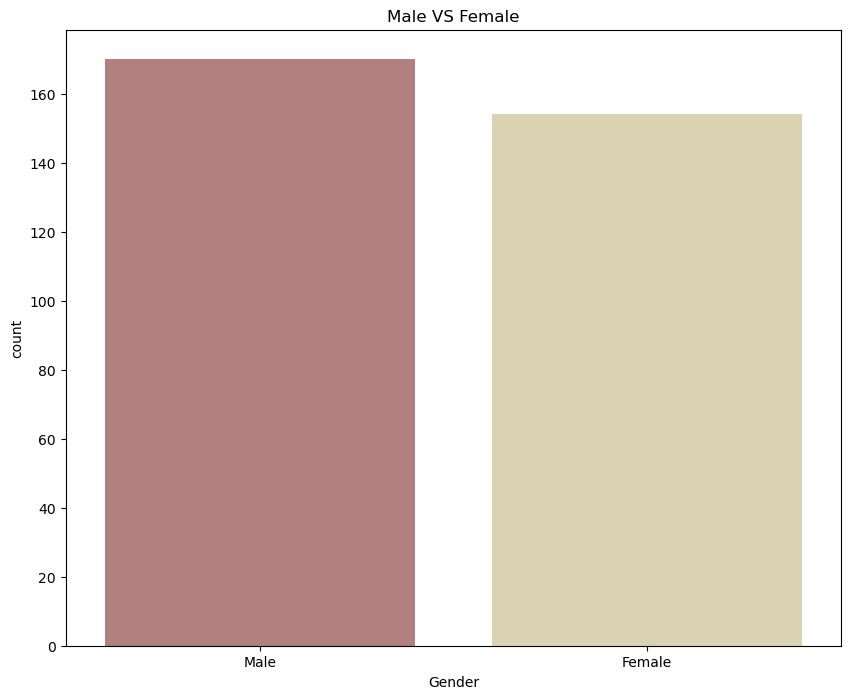

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Gender',palette='pink')
plt.title("Male VS Female")
plt.show()          

In [17]:
df['Job Title'].value_counts()

Job Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

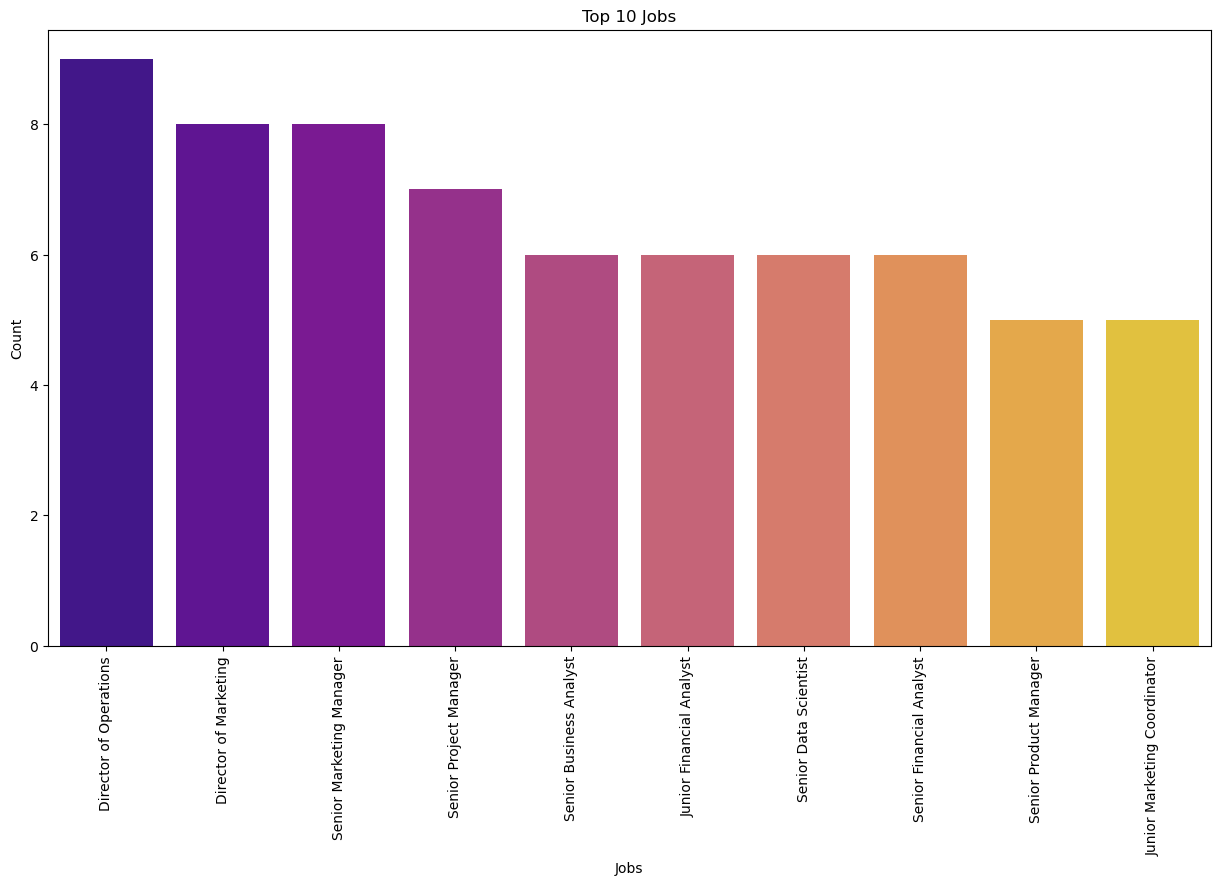

In [18]:
top_jobs= df['Job Title'].value_counts().head(10)
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=df, x=top_jobs.index,y=top_jobs.values,palette='plasma')
plt.title("Top 10 Jobs")
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.show()   

In [19]:
df.sample(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
32,29.0,Male,Master's,Data Scientist,3.0,75000.0
136,46.0,Male,Master's,Senior Project Manager,19.0,140000.0


In [20]:
sal= df.groupby('Job Title')['Salary'].sum()

In [21]:
sal

Job Title
Account Manager                  75000.0
Accountant                       55000.0
Administrative Assistant        100000.0
Business Analyst                155000.0
Business Development Manager     90000.0
                                  ...   
UX Designer                      80000.0
UX Researcher                    65000.0
VP of Finance                   200000.0
VP of Operations                190000.0
Web Developer                    65000.0
Name: Salary, Length: 174, dtype: float64

In [22]:
tob_salary = sal.sort_values(ascending=False).head(10)

In [23]:
tob_salary

Job Title
Director of Operations       1550000.0
Director of Marketing        1410000.0
Senior Marketing Manager     1050000.0
Senior Data Scientist         960000.0
Senior Project Manager        905000.0
Senior Financial Analyst      660000.0
Senior Business Analyst       640000.0
Senior Product Manager        580000.0
Senior Operations Manager     540000.0
Senior Data Analyst           465000.0
Name: Salary, dtype: float64

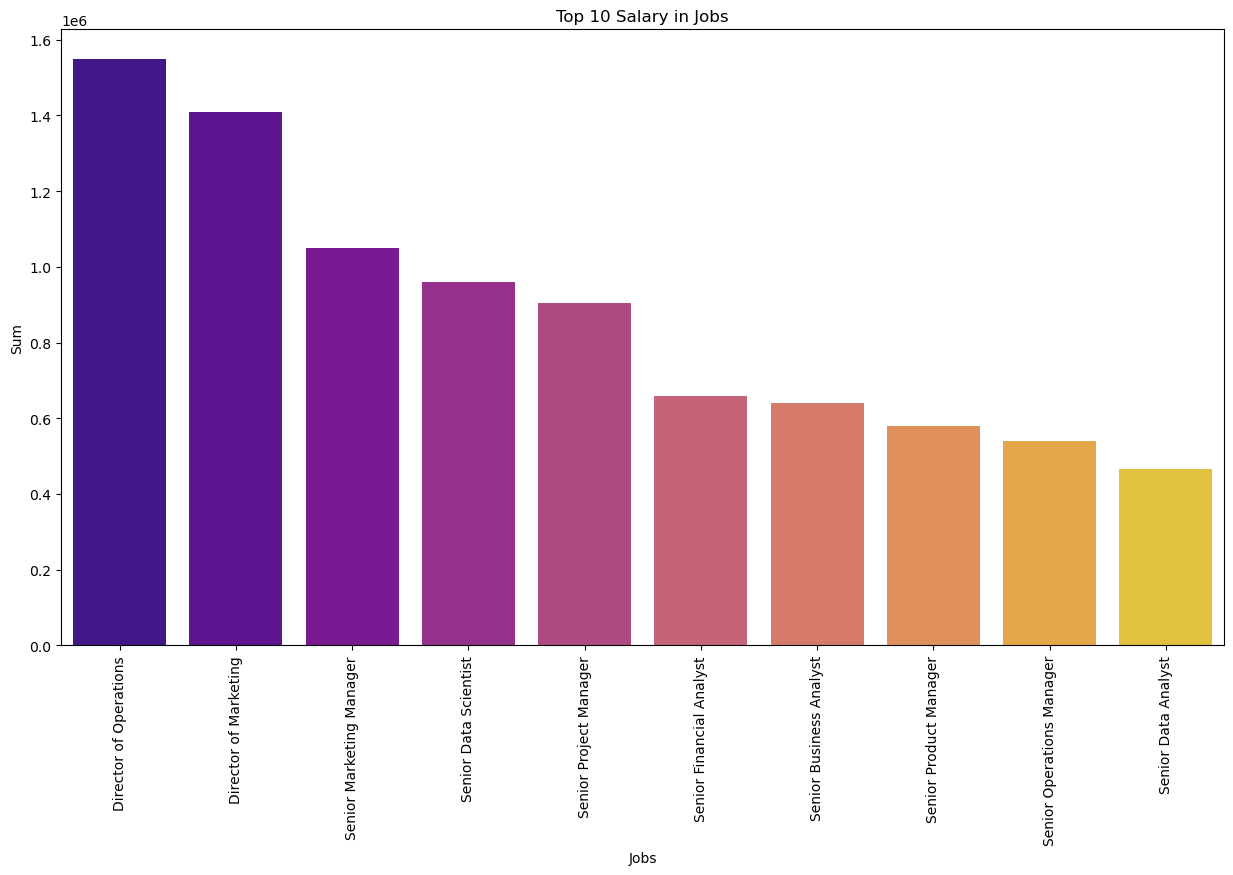

In [24]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=df, x=tob_salary.index,y=tob_salary.values,palette='plasma')
plt.title("Top 10 Salary in Jobs")
plt.xlabel('Jobs')
plt.ylabel('Sum')
plt.show()  

In [25]:
df['Years of Experience'].value_counts()

Years of Experience
3.0     27
2.0     26
9.0     19
8.0     17
5.0     16
7.0     16
4.0     16
10.0    16
16.0    15
12.0    14
20.0    13
19.0    13
15.0    12
21.0    11
1.5     11
14.0    11
6.0     11
18.0    11
13.0    10
11.0     9
22.0     8
1.0      7
17.0     5
25.0     3
0.0      3
23.0     2
24.0     1
0.5      1
Name: count, dtype: int64

In [26]:
Experience=df.groupby('Years of Experience')['Salary'].sum()
Experience

Years of Experience
0.0      100000.0
0.5       35000.0
1.0      265000.0
1.5      400350.0
2.0     1095000.0
3.0     1385000.0
4.0      930000.0
5.0     1020000.0
6.0      905000.0
7.0     1340000.0
8.0     1515000.0
9.0     1935000.0
10.0    1590000.0
11.0     910000.0
12.0    1445000.0
13.0    1190000.0
14.0    1355000.0
15.0    1550000.0
16.0    2365000.0
17.0     715000.0
18.0    1615000.0
19.0    2155000.0
20.0    2195000.0
21.0    1900000.0
22.0    1280000.0
23.0     355000.0
24.0     250000.0
25.0     600000.0
Name: Salary, dtype: float64

In [27]:
Experience.sort_values(ascending=False).head(10)

Years of Experience
16.0    2365000.0
20.0    2195000.0
19.0    2155000.0
9.0     1935000.0
21.0    1900000.0
18.0    1615000.0
10.0    1590000.0
15.0    1550000.0
8.0     1515000.0
12.0    1445000.0
Name: Salary, dtype: float64

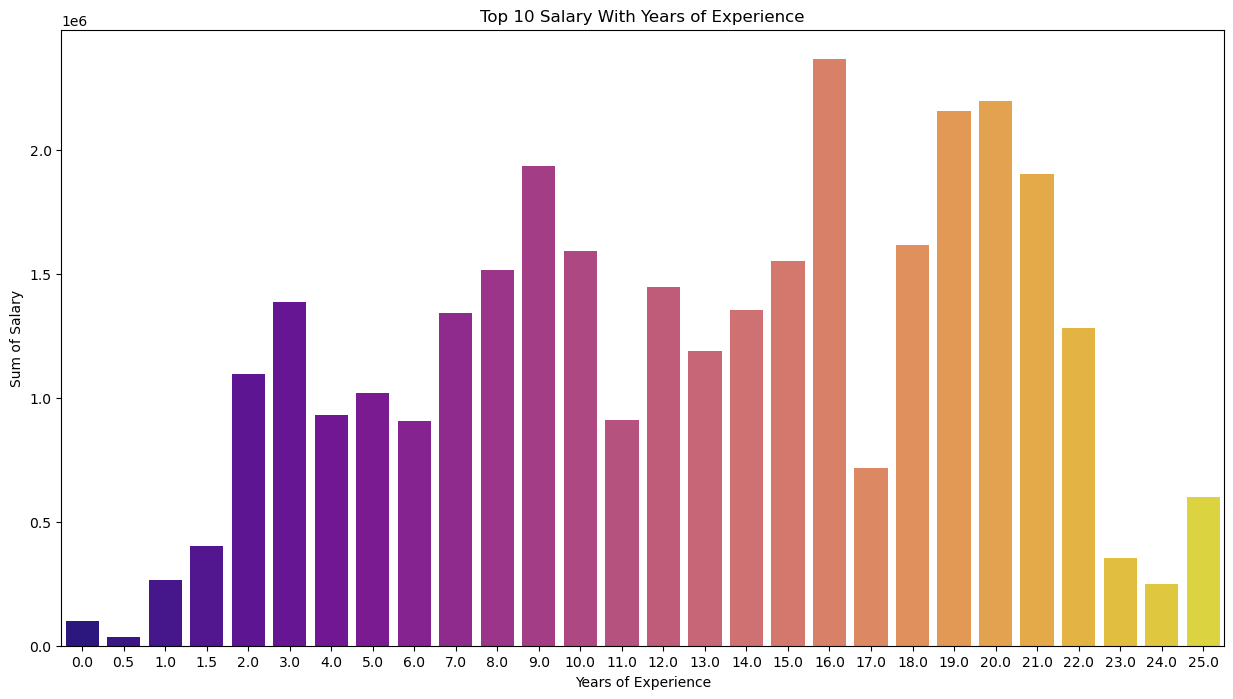

In [28]:
plt.figure(figsize=(15,8))
# plt.xticks(rotation=90)
sns.barplot(data=df, x=Experience.index,y=Experience.values,palette='plasma')
plt.title("Top 10 Salary With Years of Experience")
plt.xlabel('Years of Experience')
plt.ylabel('Sum of Salary')
plt.show() 

In [29]:
df.sample(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
340,35.0,Female,Bachelor's,Senior Financial Manager,8.0,90000.0
117,48.0,Male,PhD,Principal Engineer,20.0,170000.0
276,46.0,Male,PhD,Senior Data Analyst,17.0,160000.0


In [30]:
Balance = df.groupby('Gender')['Salary'].sum()
Balance

Gender
Female    14805000.0
Male      17590350.0
Name: Salary, dtype: float64

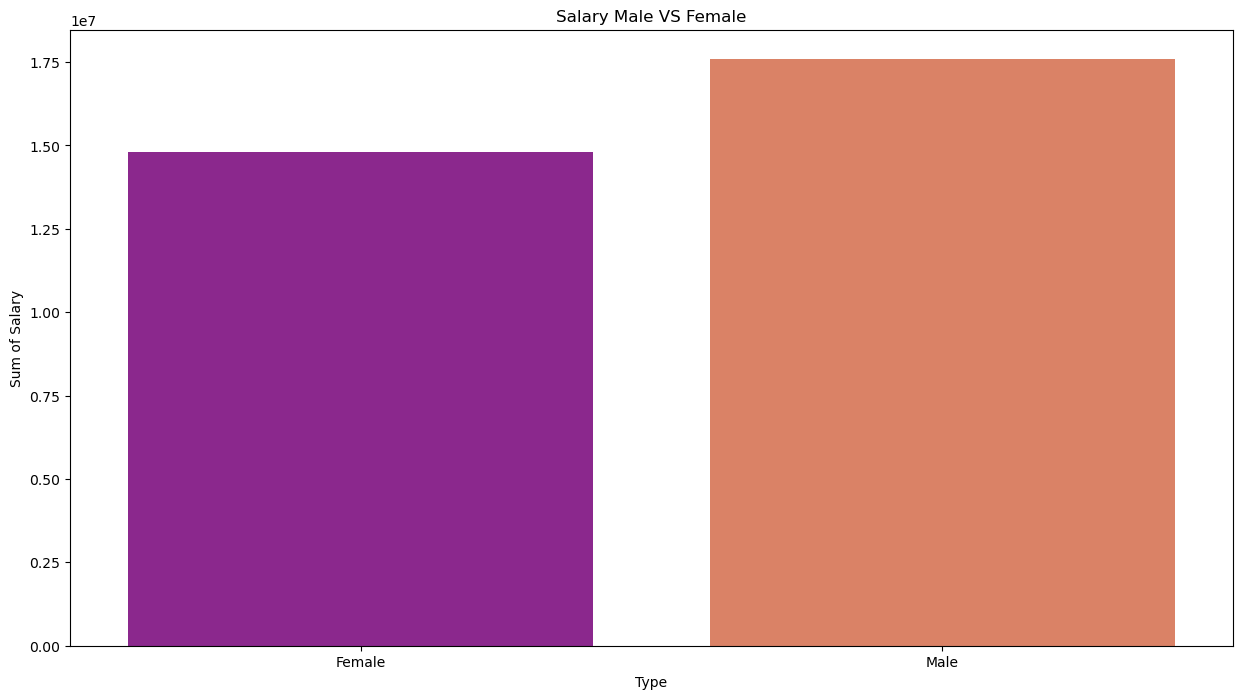

In [31]:
plt.figure(figsize=(15,8))
# plt.xticks(rotation=90)
sns.barplot(data=df, x=Balance.index,y=Balance.values,palette='plasma')
plt.title("Salary Male VS Female")
plt.xlabel('Type')
plt.ylabel('Sum of Salary')
plt.show() 

# Thanks!